# Proyecto analítica de textos

 ### Instalación e importanción de librerías.

In [7]:
!pip install ftfy

In [8]:
import unicodedata
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ftfy

In [9]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def preprocess_text(text):
    # Corregir problemas de codificación con ftfy
    text = ftfy.fix_text(text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números, pero mantener espacios
    text = re.sub(r'[^a-záéíóúñü\s]', '', text)

    # Tokenización
    tokens = word_tokenize(text)

    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [11]:
# Cargar los datos
data = pd.read_excel('data_train.xlsx')

In [12]:
# Aplicar ftfy a la columna 'Textos_espanol'
data['Textos_espanol'] = data['Textos_espanol'].apply(ftfy.fix_text)

In [13]:
# Aplicar preprocesamiento a la columna de texto
data['texto_preprocesado'] = data['Textos_espanol'].apply(preprocess_text)

In [14]:
# Eliminar filas con texto preprocesado vacío
data_cleaned = data[data['texto_preprocesado'] != '']

In [15]:
#-------------------------

In [16]:
# Imprimir el número de filas antes del preprocesamiento
print(f"Número de filas antes del preprocesamiento: {len(data)}")

Número de filas antes del preprocesamiento: 4049


In [17]:
# Aplicar preprocesamiento a la columna de texto
data['texto_preprocesado'] = data['Textos_espanol'].apply(preprocess_text)

In [18]:
# Verificar que el preprocesamiento se haya aplicado correctamente
print("\nPrimeras filas después del preprocesamiento:")
print(data[['texto_preprocesado']].head())


Primeras filas después del preprocesamiento:
                                  texto_preprocesado
0  ejemplo número consulta externa especialista c...
1  gobierno central financió directament solo gas...
2  clarament factor juego particular variedad bar...
3  ejemplo australiano victoria creó agencia prom...
4  consumo anual alcohol estima litro año hombr e...


In [19]:
# Imprimir el número de filas después del preprocesamiento
print(f"\nNúmero de filas después del preprocesamiento: {len(data_cleaned)}")


Número de filas después del preprocesamiento: 4049


In [20]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_cleaned['texto_preprocesado']
y = data_cleaned['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [22]:
# Ajustar y transformar los datos de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [23]:
# Transformar los datos de prueba
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
# Guardar los datos preprocesados
np.save('X_train_tfidf.npy', X_train_tfidf.toarray())
np.save('X_test_tfidf.npy', X_test_tfidf.toarray())
np.save('y_train.npy', y_train.to_numpy())
np.save('y_test.npy', y_test.to_numpy())

In [25]:
print("Dimensiones de los datos de entrenamiento:", X_train_tfidf.shape)
print("Dimensiones de los datos de prueba:", X_test_tfidf.shape)

Dimensiones de los datos de entrenamiento: (3239, 5000)
Dimensiones de los datos de prueba: (810, 5000)


In [26]:
print("\nInformación del DataFrame:")
print(data.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Textos_espanol      4049 non-null   object
 1   sdg                 4049 non-null   int64 
 2   texto_preprocesado  4049 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.0+ KB
None


In [27]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
               sdg
count  4049.000000
mean      4.051124
std       0.814338
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000


In [28]:
print("\nDistribución de etiquetas:")
print(data['sdg'].value_counts(normalize=True))


Distribución de etiquetas:
sdg
5    0.358360
4    0.334404
3    0.307236
Name: proportion, dtype: float64


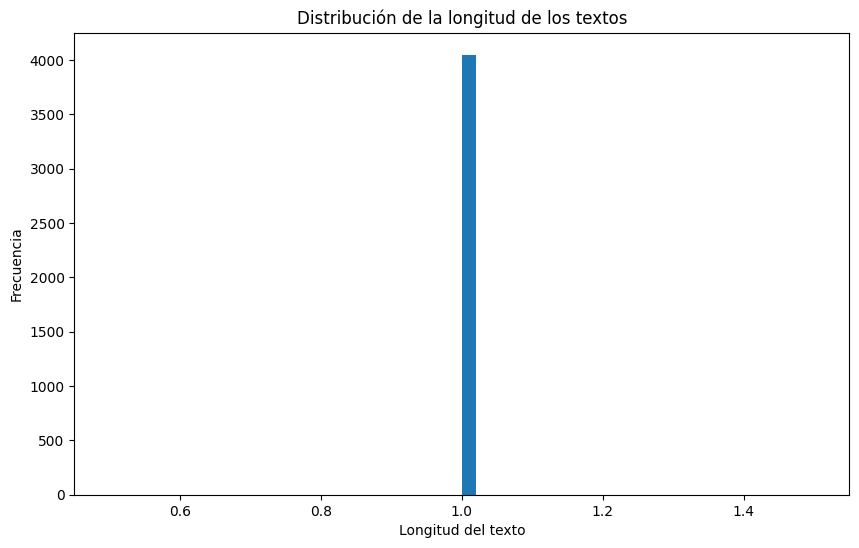

In [29]:
# Visualización de la longitud de los textos
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['longitud_texto'] = data['sdg'].apply(lambda x: len(str(x)))
plt.hist(data['longitud_texto'], bins=50)
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

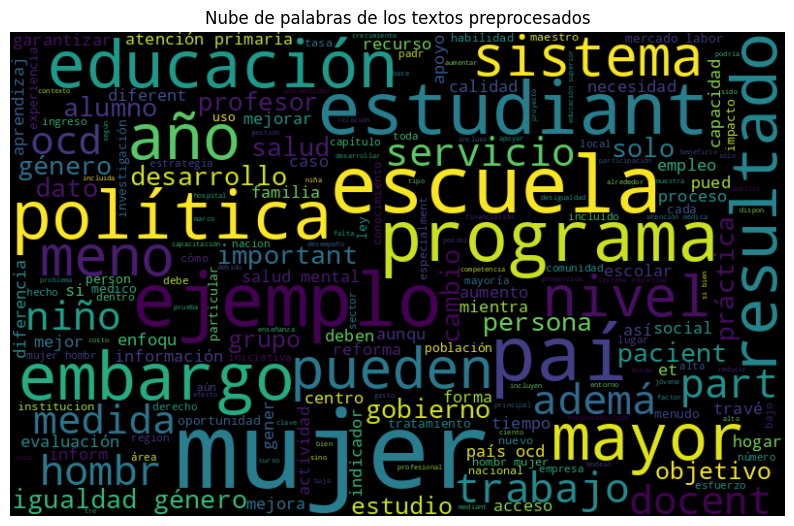

In [30]:
# Nube de palabras de los textos preprocesados
from wordcloud import WordCloud

all_words = ' '.join(data['texto_preprocesado'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de palabras de los textos preprocesados')
plt.show()

 ### Perfilamiento y entendimiento de los datos

Lectura de los datos

In [31]:
# Cargar los datos preprocesados
X_train = np.load('X_train_tfidf.npy')
X_test = np.load('X_test_tfidf.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

print("Número total de muestras:", len(X_train) + len(X_test))
print("Número de muestras de entrenamiento:", len(X_train))
print("Número de muestras de prueba:", len(X_test))
print("Dimensiones de los datos de entrenamiento:", X_train.shape)
print("Dimensiones de los datos de prueba:", X_test.shape)

Número total de muestras: 4049
Número de muestras de entrenamiento: 3239
Número de muestras de prueba: 810
Dimensiones de los datos de entrenamiento: (3239, 5000)
Dimensiones de los datos de prueba: (810, 5000)


In [32]:
# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Realizar predicciones
y_pred = rf_model.predict(X_test)

In [34]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

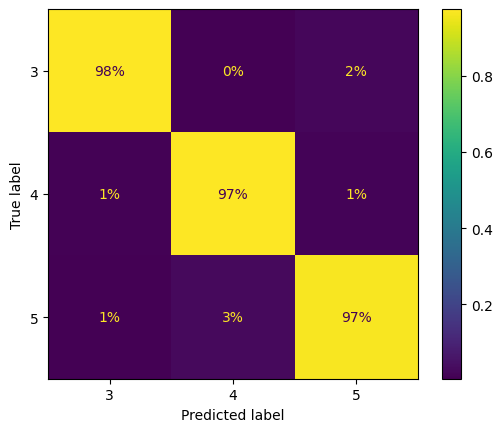

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.show

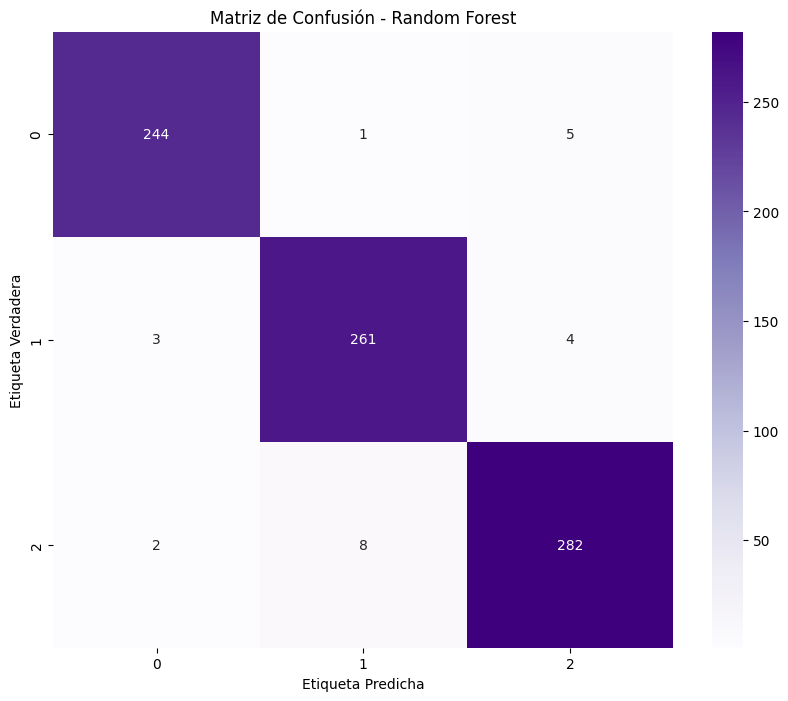

In [36]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

In [37]:
# Imprimir el informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))


Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.98      0.98      0.98       250
           4       0.97      0.97      0.97       268
           5       0.97      0.97      0.97       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



In [38]:
# Calcular y mostrar el F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\nF1-score (ponderado): {f1:.4f}")


F1-score (ponderado): 0.9716


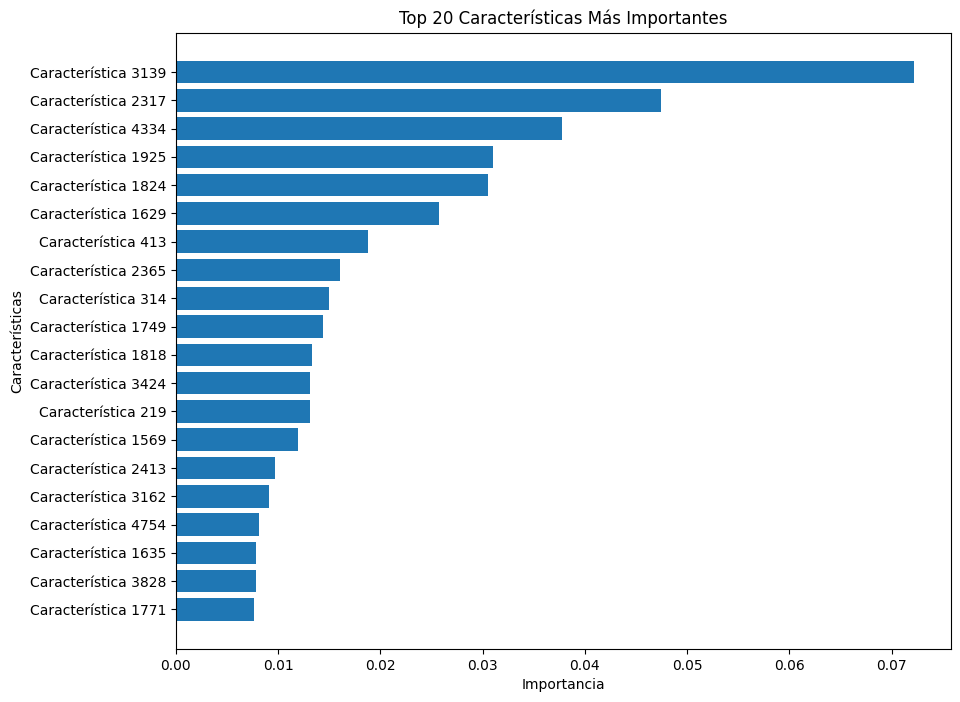

In [39]:
# Visualizar la importancia de las características
feature_importance = rf_model.feature_importances_
feature_importance_sorted = np.argsort(feature_importance)
top_features = feature_importance_sorted[-20:]  # Top 20 características

plt.figure(figsize=(10, 8))
plt.barh(range(20), feature_importance[top_features])
plt.yticks(range(20), [f"Característica {i}" for i in top_features])
plt.title('Top 20 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()